In [3]:
from google.colab import drive
drive.mount('/content/drive')
with open('/content/drive/My Drive/team1.json', 'r') as f:
    content = f.read()
print(content)

Streaming output truncated to the last 5000 lines.
{"Time":"2022-11-11 20:08:34","Document":"Bridge","Tab":"N/A","User":"StudentA2","Description":"Cancel Operation"},
{"Time":"2022-11-11 20:08:07","Document":"Bridge","Tab":"Part Studio 1","User":"StudentA2","Description":"Add part studio feature"},
{"Time":"2022-11-11 20:07:55","Document":"Bridge","Tab":"Part Studio 1","User":"StudentA2","Description":"Change Element Timings Event"},
{"Time":"2022-11-11 20:07:54","Document":"Bridge","Tab":"Assembly 1","User":"StudentA2","Description":"Tab Assembly 1 of type ASSEMBLY closed by StudentA2"},
{"Time":"2022-11-11 20:07:54","Document":"Bridge","Tab":"Part Studio 1","User":"StudentA2","Description":"Tab Part Studio 1 of type PARTSTUDIO opened by StudentA2"},
{"Time":"2022-11-11 20:07:25","Document":"Bridge","Tab":"N/A","User":"StudentA2","Description":"Stop assembly drag"},
{"Time":"2022-11-11 20:07:25","Document":"Bridge","Tab":"Assembly 1","User":"StudentA2","Description":"Drag : instance"}

In [4]:
import json
person = json.loads(content)

filtered_data = []
count = 0
for item in person:
  if item.get("Tab") == "N/A" and item.get("User") == "StudentA1":
    filtered_data.append(item)
    count += 1  # Increment the counter

#print(filtered_data)
print("Number of matching items:", count)



Number of matching items: 950


In [8]:
!pip install matplotlib

In [9]:
import json
import matplotlib.pyplot as plt

# Load the content of the JSON file
with open('/content/drive/My Drive/team1.json', 'r') as f:
    content = f.read()

person = json.loads(content)

all_part_progress = {}
for item in person:
    part_type = item.get("Part Type")
    date = item.get("Date")
    progress = item.get("Progress")
    if part_type and date and progress:
        if part_type not in all_part_progress:
            all_part_progress[part_type] = []
        all_part_progress[part_type].append({
            "date": date,
            "progress": progress
        })

# Create a graph for each part type
for part_type, progress_list in all_part_progress.items():
    dates = [item['date'] for item in progress_list]
    progress_values = [item['progress'] for item in progress_list]

    plt.figure()  # Create a new figure for each graph
    plt.plot(dates, progress_values)
    plt.xlabel("Date")
    plt.ylabel("Progress")
    plt.title(f"Progress for {part_type}")
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Adjust layout to prevent labels from overlapping
    plt.show()

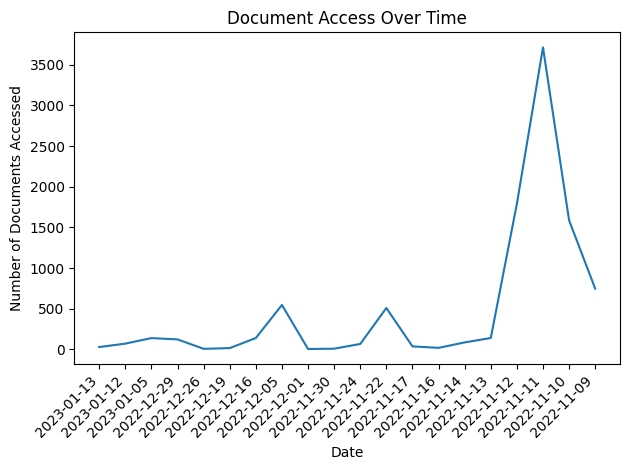

In [10]:
import json
import matplotlib.pyplot as plt
from collections import Counter

# Load the content of the JSON file
with open('/content/drive/My Drive/team1.json', 'r') as f:
    content = f.read()

person = json.loads(content)

# Extract document access times
document_times = [item.get("Time") for item in person if item.get("Time")]

# Count document accesses per day
daily_counts = Counter([time.split()[0] for time in document_times])

# Prepare data for plotting
dates = list(daily_counts.keys())
counts = list(daily_counts.values())

# Create the plot
plt.figure()
plt.plot(dates, counts)
plt.xlabel("Date")
plt.ylabel("Number of Documents Accessed")
plt.title("Document Access Over Time")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<ipython-input-11-cffd9f3e42ff>:28: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


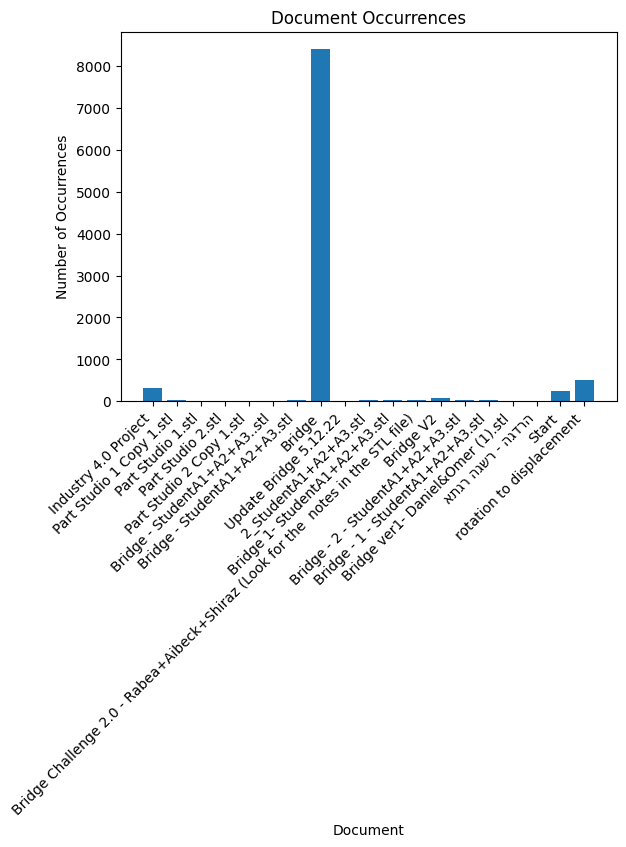

In [11]:
import json
import matplotlib.pyplot as plt
from collections import Counter

# Load the content of the JSON file
with open('/content/drive/My Drive/team1.json', 'r') as f:
    content = f.read()

person = json.loads(content)

# Extract document names
documents = [item.get("Document") for item in person if item.get("Document")]

# Count occurrences of each document
document_counts = Counter(documents)

# Prepare data for plotting
document_names = list(document_counts.keys())
counts = list(document_counts.values())

# Create the column chart
plt.figure()
plt.bar(document_names, counts)
plt.xlabel("Document")
plt.ylabel("Number of Occurrences")
plt.title("Document Occurrences")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

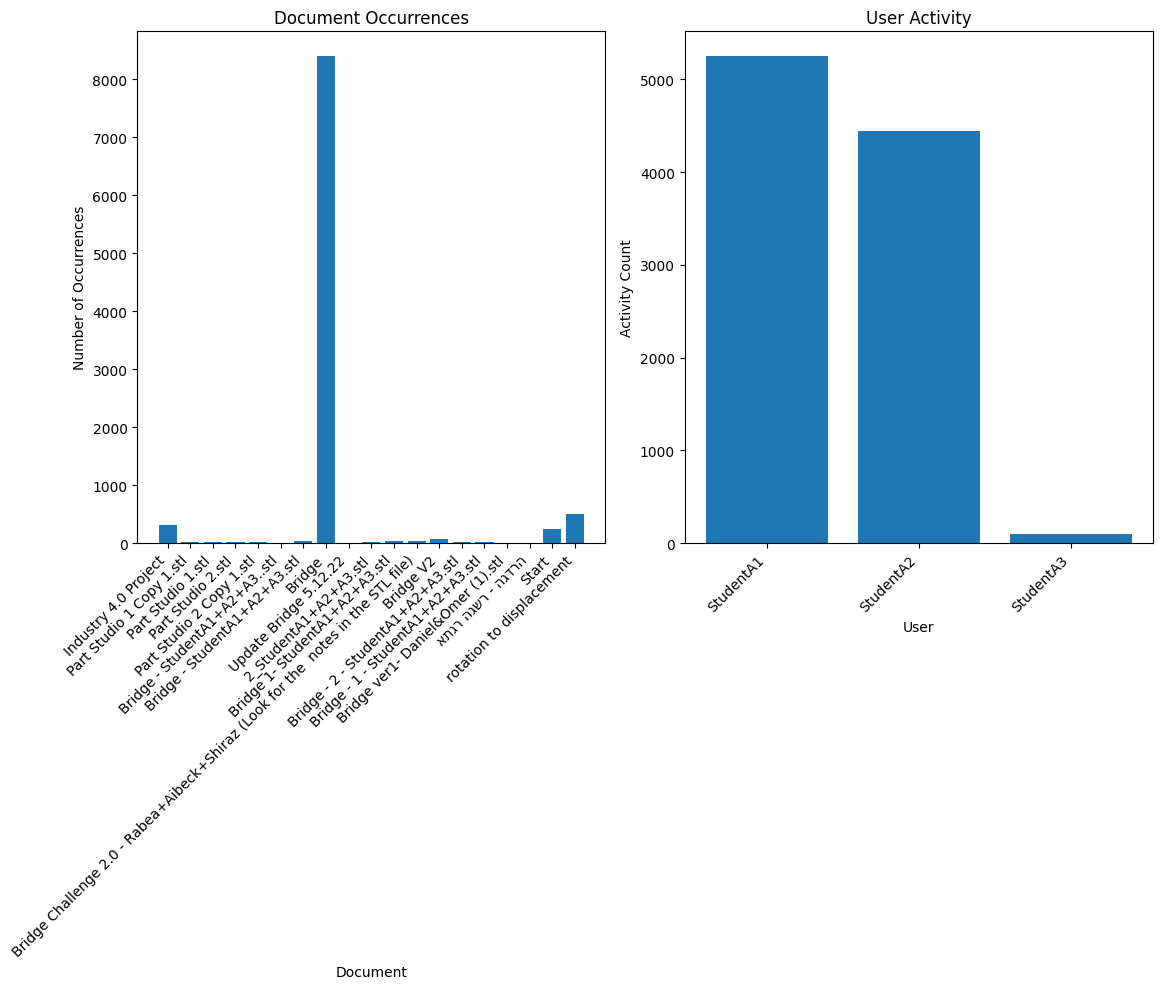

User Activity Summary:
- StudentA1 has worked on 5254 items.
- StudentA2 has worked on 4444 items.
- StudentA3 has worked on 99 items.


In [17]:
import json
import matplotlib.pyplot as plt
from collections import Counter

# Load the content of the JSON file
with open('/content/drive/My Drive/team1.json', 'r') as f:
    content = f.read()

person = json.loads(content)

# --- Document Occurrences Chart ---
# Extract document names
documents = [item.get("Document") for item in person if item.get("Document")]
document_counts = Counter(documents)
document_names = list(document_counts.keys())
doc_counts = list(document_counts.values())

plt.figure(figsize=(12, 10))  # Adjust figure size for better layout
plt.subplot(1, 2, 1)  # Create the first subplot (1 row, 2 columns, position 1)
plt.bar(document_names, doc_counts)
plt.xlabel("Document")
plt.ylabel("Number of Occurrences")
plt.title("Document Occurrences")
plt.xticks(rotation=45, ha='right')

# --- User Activity Chart ---
# Extract user names
users = [item.get("User") for item in person if item.get("User")]
user_counts = Counter(users)
user_names = list(user_counts.keys())
user_activity = list(user_counts.values())

plt.subplot(1, 2, 2)  # Create the second subplot (position 2)
plt.bar(user_names, user_activity)
plt.xlabel("User")
plt.ylabel("Activity Count")
plt.title("User Activity")
plt.xticks(rotation=45, ha='right')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

# --- User Activity Summary ---
print("User Activity Summary:")
for user, count in user_counts.items():
    print(f"- {user} has worked on {count} items.")